In [1]:
import os
import numpy as np
import scipy.io as sio
import h5py
import matplotlib.pyplot as plt 

# signal processing 
import scipy.signal as ssignal

# fancy plot stuff 
import sciplotlib.style as splstyle
import sciplotlib.polish as splpolish 



# Load matlab path

In [2]:
mat_filepath = '/home/timsit/mecp2/data/PAT200219_2C_DIV17.mat'

In [3]:
f = h5py.File(mat_filepath)
data_dict = {}
for k, v in f.items():
    data_dict[k] = np.array(v)

/home/timsit/.conda/envs/msi/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [4]:
data_dict.keys()

dict_keys(['ADCz', 'channels', 'dat', 'fs', 'header', 'uV'])

In [5]:
raw_data = data_dict['dat']

In [6]:
np.shape(raw_data)

(60, 3002500)

In [13]:
# This is ported from: https://github.com/Timothysit/mecp2/blob/master/Matlab_Analysis/heatMap/makeHeatMap.m
def make_grid_matrix(data_vec, num_x_channel=8, num_y_channel=8, grounded_electrode=[5]):
    
    grid_matrix = np.zeros((num_x_channel, num_y_channel))
    
    
    # remove the four corners 
    grid_matrix[0, 0] = np.nan
    grid_matrix[0, 7] = np.nan
    grid_matrix[7, 0] = np.nan 
    grid_matrix[7, 7] = np.nan
    
    num_channel = len(data_vec)
    
    if num_channel == 60:
        
        # grid_matrix.flatten()[1:6] = data_vec[0:5]
        # grid_matrix.flatten()[8:55] = data_vec[6:53]
        # grid_matrix.flatten()[57: 62] = data_vec[54:59]
    
        grid_matrix.flat[1:6] = data_vec[0:5]
        grid_matrix.flat[8:55] = data_vec[6:53]
        grid_matrix.flat[57: 62] = data_vec[54:59]
    
    return grid_matrix

In [14]:
example_data_vec = np.mean(raw_data, axis=1)
grid_matrix = make_grid_matrix(data_vec=example_data_vec)

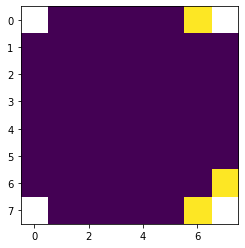

In [16]:
plt.imshow(grid_matrix)

In [ ]:
def plot_grid_layout(fig=None, ax=None):
    
    if (fig is None) and (ax is None):
        fig, ax = plt.subplots()
        fig.set_size_inches(4, 4)
    
    
    return fig